In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

plt.style.use('default')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("✅ Librerías importadas exitosamente!")

✅ Librerías importadas exitosamente!


In [45]:
df_original = pd.read_csv(r'Generacio_n_estimada_de_residuos_peligrosos_por_tipo_de_residuo_2017-2023.csv',
encoding='latin1')

print("✅ Archivo CSV cargado exitosamente!")
print(df_original.info())
df_original.head()

✅ Archivo CSV cargado exitosamente!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Entidad Federaativa  6375 non-null   int64  
 1   Entidad federativa      6375 non-null   object 
 2   Municipio               6375 non-null   object 
 3   Año                     6375 non-null   int64  
 4   Subsector               6335 non-null   object 
 5   Categoría de generador  6375 non-null   object 
 6   Categoría del residuo   6366 non-null   object 
 7   Tipo de residuo         6345 non-null   object 
 8   Generación estimada     6375 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 448.4+ KB
None


,ID Entidad Federaativa,Entidad federativa,Municipio,Año,Subsector,Categoría de generador,Categoría del residuo,Tipo de residuo,Generación estimada
0,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,"Gasolina, diesel y naftas gastados o sucios pr...",Pequeño Generador,1.22
1,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,"Gasolina, diesel y naftas gastados o sucios pr...","Mezclas de combustibles sucios, mezclas de hid...",0.04
2,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Liquidos de proceso,"Agua contaminada con hidrocarburos, combustibl...",0.09
3,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Lodos aceitosos,"Con contaminacion de hidrocarburos, combustibl...",1.08
4,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Residuos solidos,"Estopa, trapo, plasticos, carton, madera, broc...",3.12


# Plan de Ejecución del Proceso ETL

Este documento detalla el plan de trabajo para el diseño e implementación de un proceso ETL (Extracción, Transformación, Carga) básico utilizando Python (principalmente Pandas) sobre nuestro conjunto de datos seleccionado de datos.gob.mx.

---

## 1. Integrantes del Equipo

* Ayala Garcia Jonathan David
* Acosta Guerra Andres Isai
* Castañeda Rodriguez Jaime
* Hernandez Ramirez Adrian



## 2. Dataset Seleccionado

* **Nombre del Dataset:** Residuos Peligrosos Generados por Entidad Federativa y Municipio
* **Enlace al Dataset en datos.gob.mx:** [https://datos.gob.mx/busca/dataset/residuos-peligrosos-generados-por-entidad]

## 3. Objetivo de Análisis Principal

Nuestros análisis principales con este dataset para el proyecto integrador incluyen:

* Detectar y cuantificar registros duplicados y posibles inconsistencias en los datos de residuos peligrosos, para asegurar la calidad y unicidad de la información.
* Identificar y analizar valores faltantes en las variables clave, con el fin de evaluar la completitud del dataset y definir estrategias de imputación o limpieza.
* Detectar valores atípicos en las variables numéricas relevantes (por ejemplo, "Generación estimada"), para identificar posibles errores de captura o casos excepcionales que requieran revisión.

Estas decisiones guiarán las transformaciones necesarias para

## 4. Diseño Detallado del Proceso ETL

### 4.1. Plan de Extracción (E)

* **Archivo a Leer:** residuos_peligrosos.csv
* **Formato del Archivo:** CSV
* **Parámetros de Lectura (ej. para CSV):**
    * **Separador:** `,`
    * **Encoding:** `utf-8`
    * **Encabezados:** Sí
* **Selección Inicial de Columnas:**
    * Se cargarán todas las columnas y se realizará la selección en la fase de Transformación.

In [46]:
faltantes = df_original.isnull().sum()
print(f" \n Columnas con valores faltantes: \n{faltantes}")


porcentaje_faltantes = (faltantes / len(df_original)) * 100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(f" \n Porcentaje de valores faltantes por columna: \n{porcentaje_faltantes}")

columnas_mas_20 = porcentaje_faltantes[porcentaje_faltantes > 20]
print("\nColumnas con más del 20% de valores faltantes:")
print(columnas_mas_20)

 
 Columnas con valores faltantes: 
ID Entidad Federaativa     0
Entidad federativa         0
Municipio                  0
Año                        0
Subsector                 40
Categoría de generador     0
Categoría del residuo      9
Tipo de residuo           30
Generación estimada        0
dtype: int64
 
 Porcentaje de valores faltantes por columna: 
ID Entidad Federaativa    0.000000
Entidad federativa        0.000000
Municipio                 0.000000
Año                       0.000000
Subsector                 0.627451
Categoría de generador    0.000000
Categoría del residuo     0.141176
Tipo de residuo           0.470588
Generación estimada       0.000000
dtype: float64

Columnas con más del 20% de valores faltantes:
Series([], dtype: float64)


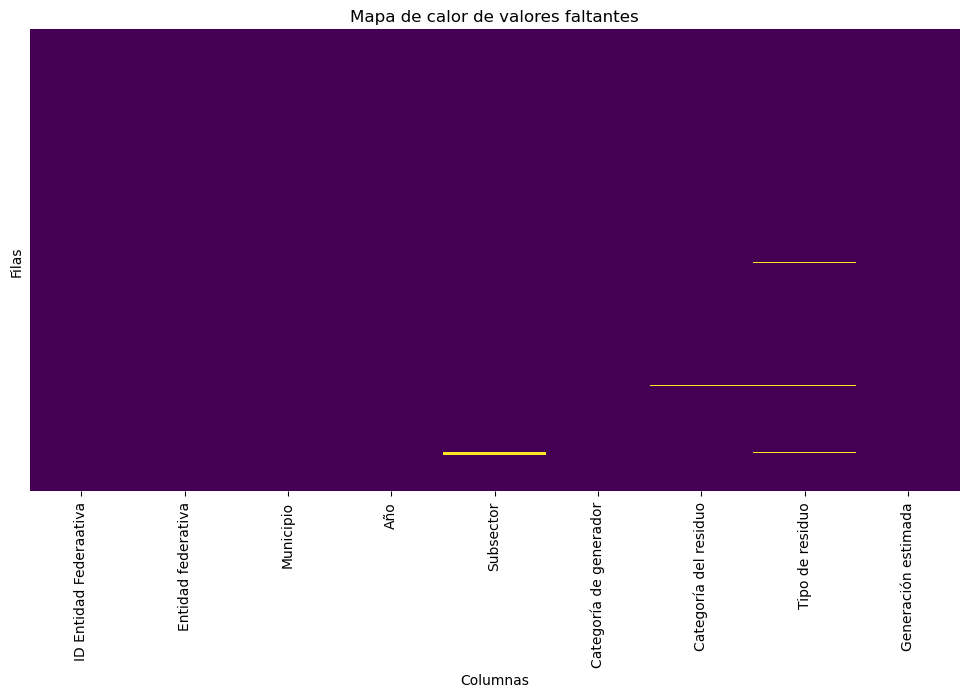

In [47]:

plt.figure(figsize=(12, 6))
sns.heatmap(df_original.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de calor de valores faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

In [48]:

duplicados_exactos = df_original.duplicated().sum()
print(f"\nNúmero de registros duplicados exactos: {duplicados_exactos}")

# Duplicados basados en 'ID Entidad Federaativa'
#duplicados_id_entidad = df_original.duplicated(subset=['ID Entidad Federaativa']).sum()
#print(f"\nNúmero de registros duplicados basados en ID Entidad Federaativa: {duplicados_id_entidad}")

# Duplicados por 'Entidad federativa', 'Municipio' y 'Año'
#duplicados_entidad_municipio_anio = df_original.duplicated(subset=['Entidad federativa', 'Municipio', 'Año']).sum()
#print(f"\nNúmero de registros duplicados por Entidad federativa + Municipio + Año: {duplicados_entidad_municipio_anio}")

# Iniciales de 'Entidad federativa' y 'Municipio' para detectar posibles variaciones
df_original['EntidadInitial'] = df_original['Entidad federativa'].str[0].str.upper()
df_original['MunicipioInitial'] = df_original['Municipio'].str[0].str.upper()
posibles_variaciones = df_original.duplicated(subset=['EntidadInitial', 'MunicipioInitial', 'Año'], keep=False)
variaciones_ejemplo = df_original[posibles_variaciones]
print("\nEjemplos de posibles registros similares con variaciones en el nombre de la entidad o municipio:")
print(variaciones_ejemplo[['Entidad federativa', 'Municipio', 'Año']].head(10))

# Mostrar columnas con valores faltantes
print("\nColumnas con valores faltantes:")
print(df_original.isnull().sum())



Número de registros duplicados exactos: 66

Ejemplos de posibles registros similares con variaciones en el nombre de la entidad o municipio:
  Entidad federativa Municipio   Año
0     Aguascalientes  Sin Dato  2017
1     Aguascalientes  Sin Dato  2017
2     Aguascalientes  Sin Dato  2017
3     Aguascalientes  Sin Dato  2017
4     Aguascalientes  Sin Dato  2017
5     Aguascalientes  Sin Dato  2017
6     Aguascalientes  Sin Dato  2017
7     Aguascalientes  Sin Dato  2017
8     Aguascalientes  Sin Dato  2017
9     Aguascalientes  Sin Dato  2017

Columnas con valores faltantes:
ID Entidad Federaativa     0
Entidad federativa         0
Municipio                  0
Año                        0
Subsector                 40
Categoría de generador     0
Categoría del residuo      9
Tipo de residuo           30
Generación estimada        0
EntidadInitial             0
MunicipioInitial           0
dtype: int64



📊 GENERACIÓN ESTIMADA
------------------------------
count     6375.000000
mean        42.860069
std        828.463357
min          0.000000
25%          0.020000
50%          0.190000
75%          1.000000
max      52775.000000
Name: Generación estimada, dtype: float64
🔎 Atípicos detectados fuera del rango 0-1000000: 0


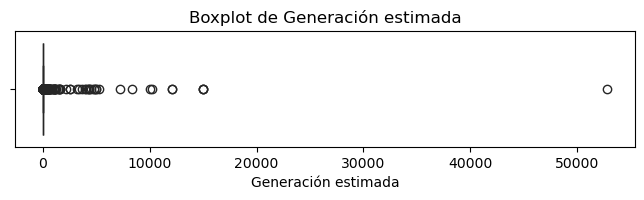

In [49]:

rangos_validos = {
    'Generación estimada': (0, 1_000_000),  # Ejemplo: de 0 a 1 millón (ajusta según contexto)
    # Agrega aquí otras variables numéricas si las tienes, por ejemplo:
    # 'OtraVariableNumerica': (min, max),
}

variables = list(rangos_validos.keys())

for var in variables:
    print(f"\n📊 {var.upper()}")
    print("-" * 30)
    
    # Convertir a numérico, forzando errores a NaN
    df_original[var] = pd.to_numeric(df_original[var], errors='coerce')
    
    # Estadísticas descriptivas
    print(df_original[var].describe())
    
    # Identificar valores fuera de rango
    min_val, max_val = rangos_validos[var]
    atipicos = df_original[(df_original[var] < min_val) | (df_original[var] > max_val)]
    print(f"🔎 Atípicos detectados fuera del rango {min_val}-{max_val}: {len(atipicos)}")

    # Visualización boxplot
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df_original[var], color="purple")
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.show()

### 4.2. Plan de Transformación (T)

Esta es la fase más crítica. Aquí detallamos las acciones que se tomarán para limpiar y estructurar los datos, columna por columna si es necesario, basándonos en nuestra exploración previa y los objetivos de análisis.

* **4.2.1. Renombrar/Estandarizar Columnas:**
    * **Lista de Columnas a Renombrar:**
        * `ID Entidad Federaativa` -> `ID_Entidad_Federativa` (Justificación: Corregir error ortográfico y estandarizar a snake_case)
        * `Entidad federativa` -> `Entidad_Federativa` (Justificación: Estandarizar a snake_case)
        * `Generación estimada` -> `Generacion_Estimada` (Justificación: Estandarizar a snake_case y eliminar acentos)
        * [Añadir más si es necesario]

In [50]:

# Diccionario de renombrado
renombrar_columnas = {
    'ID Entidad Federaativa': 'ID_Entidad_Federativa',
    'Entidad federativa': 'Entidad_Federativa',
    'Generación estimada': 'Generacion_Estimada',
    # Agrega más si es necesario
}

df_original = df_original.rename(columns=renombrar_columnas)

# Mostrar las columnas ya renombradas
print("Columnas después del renombrado:")
print(df_original.columns.tolist())

Columnas después del renombrado:
['ID_Entidad_Federativa', 'Entidad_Federativa', 'Municipio', 'Año', 'Subsector', 'Categoría de generador', 'Categoría del residuo', 'Tipo de residuo', 'Generacion_Estimada', 'EntidadInitial', 'MunicipioInitial']


* **4.2.2. Selección de Columnas (Eliminación de No Necesarias):**
    * **Columnas Finales Necesarias:**
        * `ID_Entidad_Federativa` (Identificador único de la entidad federativa)
        * `Entidad_Federativa` (Nombre de la entidad federativa)
        * `Municipio` (Nombre del municipio)
        * `Año` (Año de registro)
        * `Subsector` (Clasificación del subsector)
        * `Categoria_de_Generador` (Categoría del generador de residuos)
        * `Categoria_del_Residuo` (Tipo de residuo)
        * `Tipo_de_Residuo` (Clasificación específica del residuo)
        * `Generacion_Estimada` (Cantidad estimada de residuos generados)
        * [Añadir más si es necesario]
        > Estas columnas son importantes porque contienen la información clave para el análisis geográfico, temporal y cuantitativo de los residuos peligrosos.

    * **Columnas a Eliminar:**
        * [Ejemplo: `Columna_Innecesaria`] (No aporta información relevante para el análisis)
        * [Ejemplo: `Columna_Con_Muchos_Nulos`] (Demasiados valores faltantes)
        * [Añadir más si es necesario]

In [51]:
# Lista de columnas finales necesarias
columnas_finales = [
    'ID_Entidad_Federativa',
    'Entidad_Federativa',
    'Municipio',
    'Año',
    'Subsector',
    'Categoría de generador',
    'Categoría del residuo',
    'Tipo de residuo',
    'Generacion_Estimada'
]

df_final = df_original[columnas_finales]

print("Columnas finales seleccionadas:")
print(df_final.columns.tolist())

Columnas finales seleccionadas:
['ID_Entidad_Federativa', 'Entidad_Federativa', 'Municipio', 'Año', 'Subsector', 'Categoría de generador', 'Categoría del residuo', 'Tipo de residuo', 'Generacion_Estimada']


* **4.2.3. Corrección de Tipos de Datos:**
    * **Columna `Año`:** Convertir a tipo `int`. (Justificación: Para facilitar análisis temporales y agrupaciones por año.)
    * **Columna `Generacion_Estimada`:** Convertir a tipo `float`. (Justificación: Para realizar cálculos y análisis estadísticos sobre la cantidad de residuos.)
    * **Columna `Entidad_Federativa`, `Municipio`, `Subsector`, `Categoria_de_Generador`, `Categoria_del_Residuo`, `Tipo_de_Residuo`:** Convertir a tipo `category`. (Justificación: Son variables categóricas y esto optimiza memoria y análisis.)
    * *Consideraciones:* Usar `errors='coerce'` para manejar valores no convertibles.

In [52]:
# Corrección de tipos de datos
df_final['Año'] = pd.to_numeric(df_final['Año'], errors='coerce').astype('Int64')
df_final['Generacion_Estimada'] = pd.to_numeric(df_final['Generacion_Estimada'], errors='coerce')

categoricas = [
    'Entidad_Federativa',
    'Municipio',
    'Subsector',
    'Categoría de generador',
    'Categoría del residuo',
    'Tipo de residuo'
]
for col in categoricas:
    df_final[col] = df_final[col].astype('category')

print("Tipos de datos después de la conversión:")
print(df_final.dtypes)

# ...existing

Tipos de datos después de la conversión:
ID_Entidad_Federativa        int64
Entidad_Federativa        category
Municipio                 category
Año                          Int64
Subsector                 category
Categoría de generador    category
Categoría del residuo     category
Tipo de residuo           category
Generacion_Estimada        float64
dtype: object


* **4.2.4. Limpieza de Texto (para columnas categóricas/texto):**
    * **Columna `Entidad_Federativa`:**
        * Acciones: Eliminar espacios extra (`.str.strip()`), convertir a mayúsculas (`.str.upper()`), estandarizar nombres de entidades si es necesario (ej. "CDMX" a "CIUDAD DE MÉXICO").
        * (Justificación: Mejorar consistencia y permitir agrupaciones correctas.)
    * **Columna `Municipio`:**
        * Acciones: Eliminar espacios extra, convertir a mayúsculas, corregir errores ortográficos comunes.
        * (Justificación: Evitar duplicados por diferencias de formato y facilitar análisis geográfico.)
    * **Columna `Subsector`, `Categoría de generador`, `Categoría del residuo`, `Tipo de residuo`:**
        * Acciones: Eliminar espacios extra, convertir a mayúsculas, estandarizar valores si es necesario.
        * (Justificación: Mejorar calidad de los datos categóricos y facilitar análisis.)

In [53]:
# Limpieza de texto para columnas categóricas
df_final['Entidad_Federativa'] = df_final['Entidad_Federativa'].str.strip().str.upper()
df_final['Municipio'] = df_final['Municipio'].str.strip().str.upper()
df_final['Subsector'] = df_final['Subsector'].str.strip().str.upper()
df_final['Categoría de generador'] = df_final['Categoría de generador'].str.strip().str.upper()
df_final['Categoría del residuo'] = df_final['Categoría del residuo'].str.strip().str.upper()
df_final['Tipo de residuo'] = df_final['Tipo de residuo'].str.strip().str.upper()

# Ejemplo de estandarización específica (opcional)
df_final['Entidad_Federativa'] = df_final['Entidad_Federativa'].replace({'CDMX': 'CIUDAD DE MÉXICO'})

print("Valores únicos de Entidad_Federativa después de limpieza:")
print(df_final['Entidad_Federativa'].unique())

# ...existing

Valores únicos de Entidad_Federativa después de limpieza:
['AGUASCALIENTES' 'BAJA CALIFORNIA' 'BAJA CALIFORNIA SUR' 'CAMPECHE'
 'COAHUILA DE ZARAGOZA' 'COLIMA' 'CHIAPAS' 'CHIHUAHUA' 'CIUDAD DE MÉXICO'
 'DURANGO' 'GUANAJUATO' 'GUERRERO' 'HIDALGO' 'JALISCO' 'MÉXICO'
 'MICHOACAN DE OCAMPO' 'MICHOACÁN DE OCAMPO' 'MORELOS' 'NAYARIT'
 'NUEVO LEÓN' 'OAXACA' 'PUEBLA' 'QUERÉTARO' 'QUINTANA ROO'
 'SAN LUIS POTOSÍ' 'SINALOA' 'SONORA' 'TABASCO' 'TAMAULIPAS' 'TLAXCALA'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'YUCATÁN' 'ZACATECAS']


* **4.2.5. Manejo de Valores Faltantes (NaNs):**
    * **Columna `Subsector`:**
        * Estrategia: Rellenar valores faltantes con 'DESCONOCIDO'.
        * Justificación: Es una variable categórica y no se puede imputar numéricamente; asignar 'DESCONOCIDO' permite conservar los registros para el análisis.
    * **Columna `Categoría del residuo`:**
        * Estrategia: Rellenar valores faltantes con 'NO ESPECIFICADO'.
        * Justificación: Mantener la integridad del dataset y evitar la eliminación de registros potencialmente útiles.
    * **Columna `Tipo de residuo`:**
        * Estrategia: Rellenar valores faltantes con 'NO ESPECIFICADO'.
        * Justificación: Similar a la anterior, para no perder información relevante y facilitar el análisis.

In [54]:
# Manejo de valores faltantes
df_final['Subsector'] = df_final['Subsector'].fillna('DESCONOCIDO')
df_final['Categoría del residuo'] = df_final['Categoría del residuo'].fillna('NO ESPECIFICADO')
df_final['Tipo de residuo'] = df_final['Tipo de residuo'].fillna('NO ESPECIFICADO')

print("Valores faltantes por columna después del tratamiento:")
print(df_final.isnull().sum())


Valores faltantes por columna después del tratamiento:
ID_Entidad_Federativa     0
Entidad_Federativa        0
Municipio                 0
Año                       0
Subsector                 0
Categoría de generador    0
Categoría del residuo     0
Tipo de residuo           0
Generacion_Estimada       0
dtype: int64


* **4.2.6. Manejo de Duplicados:**
    * **Identificación:** Se buscarán filas duplicadas completas y también duplicados basados en el subconjunto de columnas `['ID_Entidad_Federativa', 'Entidad_Federativa', 'Municipio', 'Año', 'Generacion_Estimada']`.
    * **Tratamiento:** Se eliminarán los duplicados conservando la primera ocurrencia usando `.drop_duplicates()`.
    * Justificación: Asegurar la unicidad de los registros clave y evitar el sesgo en los análisis por registros repetidos.

In [55]:
# Eliminar duplicados completos
df_final = df_final.drop_duplicates()

# Eliminar duplicados basados en un subconjunto de columnas clave
df_final = df_final.drop_duplicates(subset=[
    'ID_Entidad_Federativa',
    'Entidad_Federativa',
    'Municipio',
    'Año',
    'Generacion_Estimada'
])

print(f"Total de registros después de eliminar duplicados: {len(df_final)}")


Total de registros después de eliminar duplicados: 4918


* **4.2.7. Validación/Corrección de Errores (Valores Atípicos/Imposibles):**
    * **Columna `Generacion_Estimada`:**
        * Rango Lógico: Entre 0 y 1,000,000.
        * Acción: Reemplazar valores fuera de rango por NaN y luego decidir si imputar o eliminar esos registros.
        * Justificación: Evitar sesgos en los análisis estadísticos y asegurar que los resultados reflejen datos plausibles.

In [56]:
# Validación/corrección de valores atípicos en 'Generacion_Estimada'
min_val, max_val = 0, 1_000_000  # Ajusta el rango según el contexto real
fuera_de_rango = (df_final['Generacion_Estimada'] < min_val) | (df_final['Generacion_Estimada'] > max_val)
df_final.loc[fuera_de_rango, 'Generacion_Estimada'] = np.nan

print("Cantidad de valores fuera de rango en 'Generacion_Estimada' corregidos a NaN:", fuera_de_rango.sum())


Cantidad de valores fuera de rango en 'Generacion_Estimada' corregidos a NaN: 0


* **4.2.8. (Opcional) Feature Engineering Básico:**
    * **Nueva Columna `Entidad_Municipio`:**
        * Origen: Concatenar las columnas `Entidad_Federativa` y `Municipio`.
        * Cálculo: `df['Entidad_Municipio'] = df['Entidad_Federativa'] + ' - ' + df['Municipio']`
        * Justificación: Facilita el análisis geográfico combinado y la visualización de datos por entidad y municipio juntos.
    * **Nueva Columna `Generacion_Estimada_Log`:**
        * Origen: Transformación logarítmica de `Generacion_Estimada`.
        * Cálculo: `df['Generacion_Estimada_Log'] = np.log1p(df['Generacion_Estimada'])`
        * Justificación: Permite analizar la variable en una escala menos sesgada por valores extremos y facilita la visualización y modelado.

In [57]:
# Feature Engineering: nueva columna combinada de entidad y municipio
df_final['Entidad_Municipio'] = df_final['Entidad_Federativa'] + ' - ' + df_final['Municipio']

# Feature Engineering: transformación logarítmica de la generación estimada
df_final['Generacion_Estimada_Log'] = np.log1p(df_final['Generacion_Estimada'])

print("Nuevas columnas creadas:")
print(['Entidad_Municipio', 'Generacion_Estimada_Log'])

Nuevas columnas creadas:
['Entidad_Municipio', 'Generacion_Estimada_Log']


* **4.2.9. Estructura Final del DataFrame(s):**
    * Descripción: El DataFrame final contendrá únicamente las columnas relevantes y limpias para el análisis de residuos peligrosos. Todas las columnas estarán estandarizadas, sin valores faltantes críticos, y con tipos de datos apropiados. Se mantendrá un solo DataFrame principal, ya que el análisis no requiere una estructura de tablas separadas (hechos/dimensiones).
    * Ejemplo de la estructura esperada:
        ```
        DataFrame Final:
        - ID_Entidad_Federativa (int/categorical): Identificador único de la entidad federativa
        - Entidad_Federativa (category): Nombre estandarizado de la entidad federativa
        - Municipio (category): Nombre estandarizado del municipio
        - Año (int): Año del registro
        - Subsector (category): Clasificación del subsector
        - Categoría de generador (category): Tipo de generador de residuos
        - Categoría del residuo (category): Tipo general de residuo
        - Tipo de residuo (category): Clasificación específica del residuo
        - Generacion_Estimada (float): Cantidad estimada de residuos generados
        - Entidad_Municipio (string): Combinación de entidad y municipio para análisis geográfico
        - Generacion_Estimada_Log (float): Transformación logarítmica de la generación

In [58]:

print("Estructura final del DataFrame:")
print(df_final.dtypes)
print("\nPrimeras filas del DataFrame final:")
print(df_final.head())



Estructura final del DataFrame:
ID_Entidad_Federativa        int64
Entidad_Federativa          object
Municipio                   object
Año                          Int64
Subsector                   object
Categoría de generador      object
Categoría del residuo       object
Tipo de residuo             object
Generacion_Estimada        float64
Entidad_Municipio           object
Generacion_Estimada_Log    float64
dtype: object

Primeras filas del DataFrame final:
   ID_Entidad_Federativa Entidad_Federativa Municipio   Año  Subsector  \
0                      1     AGUASCALIENTES  SIN DATO  2017  PETROLERO   
1                      1     AGUASCALIENTES  SIN DATO  2017  PETROLERO   
2                      1     AGUASCALIENTES  SIN DATO  2017  PETROLERO   
3                      1     AGUASCALIENTES  SIN DATO  2017  PETROLERO   
4                      1     AGUASCALIENTES  SIN DATO  2017  PETROLERO   

  Categoría de generador                              Categoría del residuo  \
0       

### 4.3. Plan de Carga (L)

* **Destino Simulado:** [Seleccionar una opción y justificar.]
    * **Opción 1 (Recomendada): Base de Datos SQLite**
        * Nombre del archivo de la DB: `[nombre_de_su_base_de_datos.db]`
        * Nombre de la tabla: `[nombre_de_su_tabla]`
        * Parámetros `to_sql`: `if_exists='replace'`, `index=False` (para no guardar el índice de Pandas como columna).
        * Justificación: [Ej. "Simula una carga a una base de datos relacional para futuros análisis SQL."]
    * **Opción 2: Archivos Limpios (CSV o JSON)**
        * Nombre del archivo CSV: `[nombre_dataset_limpio.csv]`
        * Nombre del archivo JSON: `[nombre_dataset_limpio.json]`
        * Parámetros `to_csv`/`to_json`: `index=False` (para no guardar el índice de Pandas como columna).
        * Justificación: [Ej. "Fácilmente accesible para herramientas de análisis posteriores."]



## 5. Implementación del ETL en Python (Sección para el Código)

En esta sección del notebook, se desarrollará el código Python. Cada paso del plan anterior debe tener su correspondiente bloque de código, acompañado de comentarios explicativos y verificaciones intermedias.

### 5.1. Importación de Librerías